In [3]:
# from nltk.tokenize import word_tokenize
# from nltk.tag import pos_tag
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
from nltk import pos_tag, word_tokenize, RegexpParser
import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm
from bs4 import BeautifulSoup
import requests
import re
import numpy
import os
!pip install newspaper3k # Install the newspaper3k package using pip
!pip install lxml_html_clean
from newspaper import Article # you can keep your imports unchanged
import pandas as pd
!python -m spacy download en_core_web_trf
import matplotlib.pyplot as plt
from collections import Counter

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.4/457.4 MB 1.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.




---


1. Select any article on the website of your interest and perform Name Entity Relation (NER) analysis on it. Show all the necessary output and visualization and explain your findings. Also mention if you see any shortcoming or error in the algorithm output.

Extracted Article Text:
Despite FC Barcelona and Lionel Messi having reached an agreement and the clear intention of both parties to sign a new contract today, this cannot happen because of Spanish LaLiga regulations on player registration.

As a result of this situation, Messi shall not be staying on at FC Barcelona. Both parties deeply regret that the wishes of the player and the club will ultimately not be fulfilled.

FC Barcelona wholeheartedly expresses its gratitude to the player for his contribution to the aggrandisement of the club and wishes him all the very best for the future in his personal and professional life. ...


/usr/local/lib/python3.10/dist-packages/thinc/shims/pytorch.py:253: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(filelike, map_location=dev


Extracted Entities:
('FC Barcelona', 'ORG')
('Lionel Messi', 'PERSON')
('today', 'DATE')
('Spanish', 'NORP')
('Messi', 'PERSON')
('FC Barcelona', 'ORG')
('FC Barcelona', 'ORG')


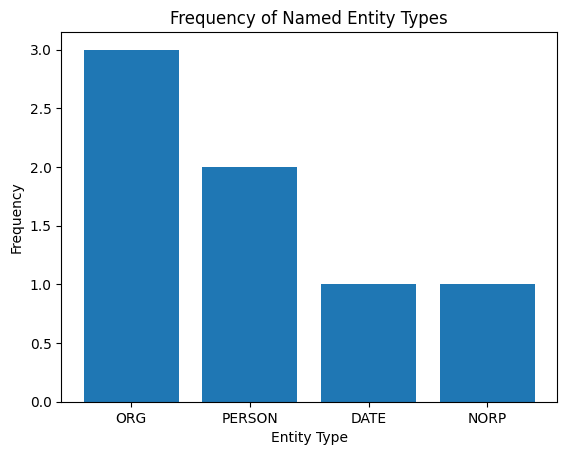

In [30]:
def extract_article_text(url):
    article = Article(url)
    article.download()
    article.parse()
    return article.text

article_url = "https://www.fcbarcelona.com/en/news/2207655/leo-messi-not-staying-at-fc-barcelona"

article_text = extract_article_text(article_url)
print("Extracted Article Text:")
print(article_text[:1500], "...")

nlp = spacy.load("en_core_web_trf")

doc = nlp(article_text)

entities = [(ent.text, ent.label_) for ent in doc.ents]

html = displacy.render(doc, style="ent", jupyter=False)

entity_labels = [ent.label_ for ent in doc.ents]
entity_counts = Counter(entity_labels)

print("\nExtracted Entities:")
for ent in entities:
    print(ent)

plt.bar(entity_counts.keys(), entity_counts.values())
plt.xlabel("Entity Type")
plt.ylabel("Frequency")
plt.title("Frequency of Named Entity Types")
plt.show()


I initially used the en_core_web_sm model by spacy, which is fast and requires less space, but is not the optimal model for NER. The results for it identified

PERSON: "FC Barcelona" and "Messi".

GPE (Geopolitical Entities): "Lionel Messi" and "Barcelona".

DATE: "today".

NORP (Nationalities or Religious/Political Groups): "Spanish".

FAC (Facilities): "FC Barcelona".

These entities are correctly identified, but there were slight inaccuracies in labeling:

"Lionel Messi" is a PERSON, not a GPE.
"FC Barcelona" was tagged as both PERSON and FAC, which could lead to confusion.


I then switched to the en_core_web_trf model, which is the slowest, heaviest
and best spacy model for NER. As expected, my NER results improved:

ORG (Organizations):
"FC Barcelona" appears multiple times as an organization. This occurence has the highest frequency.         

PERSON (People):
"Lionel Messi" and "Messi" were correctly identified as persons. This occurence has the second highest frequency.

DATE:
"Today" was identified as a date.

NORP (Nationalities, Religions, or Political Groups):
"Spanish" was correctly labeled.




--- --- --- ---


2. Select any research paper of your interest and perform word frequency and keyword extraction analysis. Use at least 3 different techniques/libraries. Show all the necessary output and visualization and explain your findings. Compare different techniques and mention if you see any shortcoming or error in the algorithm output.


In [6]:
!pip install PyPDF2
!pip install nltk

import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
import PyPDF2

nltk.download('stopwords')

with open("MIT Cheetah 3 Design and Control of a Robust, Dynamic Quadruped Robot.pdf", "rb") as file:
    pdf_reader = PyPDF2.PdfReader(file)

    text = ""
    for page_num in range(len(pdf_reader.pages)):
        page = pdf_reader.pages[page_num]
        text += page.extract_text()


def preprocess_text(text):
    text = text.lower()
    text = re.sub(f"[{string.punctuation}]", " ", text)
    text = re.sub(r"\d+", " ", text)

    stop_words = set(stopwords.words("english"))
    words = text.split()
    words = [word for word in words if word not in stop_words]

    return " ".join(words)

preprocessed_text = preprocess_text(text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most Common Words: [('robot', 67), ('leg', 63), ('control', 60), ('cheetah', 41), ('locomotion', 31), ('mit', 27), ('force', 26), ('design', 24), ('use', 23), ('robots', 23)]


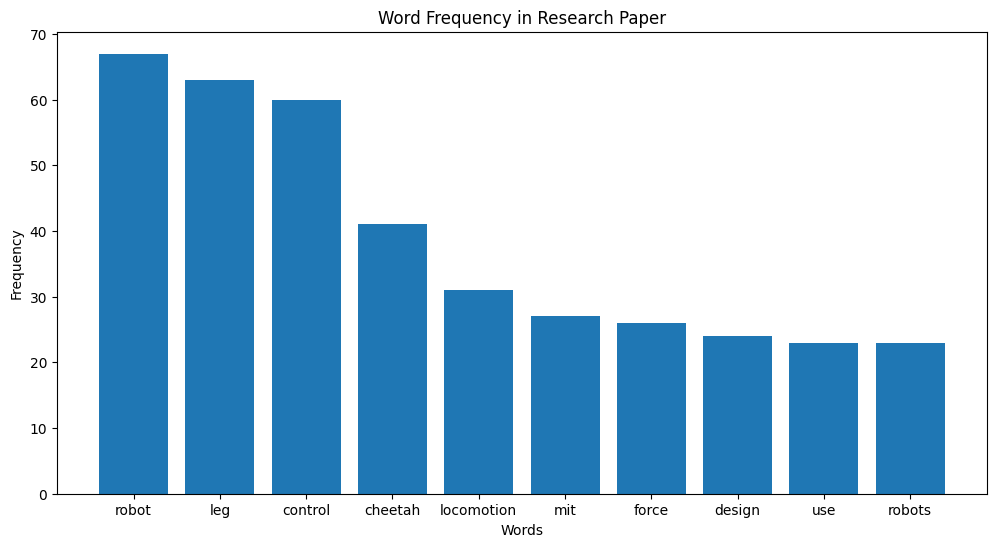

In [13]:
word_counts = Counter(preprocessed_text.split())

most_common_words = word_counts.most_common(10)
print("Most Common Words:", most_common_words)

import matplotlib.pyplot as plt

words, counts = zip(*most_common_words)
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Word Frequency in Research Paper")
plt.show()


In [14]:
vectorizer = TfidfVectorizer(max_features=10)
tfidf_matrix = vectorizer.fit_transform([preprocessed_text])
keywords = vectorizer.get_feature_names_out()

print("TF-IDF Keywords:", list(zip(keywords, tfidf_matrix.toarray()[0]*100)))

TF-IDF Keywords: [('cheetah', 30.822986883148197), ('control', 43.72563255516372), ('design', 18.63715485957798), ('foot', 17.203527562687366), ('force', 18.63715485957798), ('leg', 45.15925985205433), ('locomotion', 22.22122310180451), ('mit', 19.353968508023286), ('robot', 54.47783728184332), ('use', 16.48671391424206)]


### TF-IDF highlights terms like "control," "design," "force," and "locomotion," which are contextually significant but not necessarily the most frequent. This demonstrates TF-IDF's strength in identifying terms that are important relative to their frequency in the document versus their occurrence in general language.

In [15]:
!pip install rake-nltk
import nltk
nltk.download('punkt_tab')

from rake_nltk import Rake

rake = Rake()
rake.extract_keywords_from_text(preprocessed_text)
rake_keywords = rake.get_ranked_phrases()

print("RAKE Keywords:", rake_keywords[:10])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


RAKE Keywords: ['design robust control architecture allow variety unique behaviors important improvements design mit cheetah greatly enhance possibilities new robot used real world applications since robot ground reaction force control planning independent leg conﬁguration locomotion occur regardless way knees pointed shown figure new design incorporating b c fig unique design capabilities robot able use controllers described regardless leg orientation balance extreme conﬁgurations b make use wide range motion position limbs c powerful custom electric motor ab ad dof robot gains ability apply large lateral forces robot gains improved range motion allows exaggerated yaw motions depicted figure b addition deﬁned forward top robot able rotate legs fully body using chain leg design gives robot ability omni directionally rotate knee joint figure c future taken advantage allow robot use legs locomotion well interact surroundings carry tasks c blind stair climbing although robot preemptive kn

### RAKE extracts longer phrases such as "design robust control architecture" and "ground reaction force control planning." These phrases provide a deeper understanding of the paper's focus compared to single words, capturing contextual importance and technical phrases better than other methods.

In [20]:
import spacy
!python -m spacy download en_core_web_md
import en_core_web_md

nlp = spacy.load("en_core_web_md")
doc = nlp(preprocessed_text)

spacy_keywords = [chunk.text for chunk in doc.noun_chunks]

print("SpaCy Keywords:", spacy_keywords[:10])

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 16.1 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
SpaCy Keywords: ['cheetah design control', 'paper', 'new robust dynamic quadruped mit cheetah', 'predecessor cheetah', 'tailored mechanical design', 'simple control strategies', 'dynamic locomotion', 'high bandwidth proprioceptive actuators', 'physical inter action environment', 'new leg design']


### SpaCy identifies noun phrases like "new robust dynamic quadruped," "tailored mechanical design," and "high bandwidth proprioceptive actuators." These are concise and meaningful, summarizing key technical elements of the paper, but lack ranking or prioritization compared to TF-IDF or RAKE.

Contrast & Limitations:

Word Frequency (Counter): Captures frequently occurring words but lacks contextual understanding or differentiation between commonly used and key technical terms.

TF-IDF: Effectively identifies important terms but may miss out on longer, contextually rich phrases.

RAKE: Provides detailed phrases that add context but occasionally extracts overly specific or less relevant phrases.

SpaCy: Extracts clean noun phrases but doesn't assign importance or relevance, requiring manual interpretation.




---

3. Choose any keyword or twitter handler (page/account) of your choice and pull/scrap at least 20 (tweets) from Twitter. Manually put them in a text file. One tweet per line.

a. Read the text file line by line.

b. Perform Sentiment Analysis on the tweet and show total positive and negative
sentiment counts.

c. Display one Positive and one Negative sentiment and discuss if the algorithm
is accurate.

In [31]:
from textblob import TextBlob

with open("tweets_ext.txt", "r") as file:
    tweets = file.readlines()

positive_count = 0
negative_count = 0
positive_tweets = []
negative_tweets = []

for tweet in tweets:
    analysis = TextBlob(tweet.strip())
    sentiment = analysis.sentiment.polarity

    if sentiment > 0:
        positive_count += 1
        positive_tweets.append(tweet.strip())
    elif sentiment < 0:
        negative_count += 1
        negative_tweets.append(tweet.strip())

print(f"Total Positive Tweets: {positive_count}")
print(f"Total Negative Tweets: {negative_count}")

if positive_tweets:
    print("\nExample of Positive Tweet:")
    print(positive_tweets[0])
else:
    print("\nNo Positive Tweets found.")

if negative_tweets:
    print("\nExample of Negative Tweet:")
    print(negative_tweets[0])
else:
    print("\nNo Negative Tweets found.")

print("\nDiscussion: While the sentiment analysis performed well in detecting positive tweets, it misclassified a promotional and professional tweet as negative. This suggests that the algorithm might struggle with context or domain-specific language, particularly in promotional content. Perhaps we could try refining the sentiment model with more domain-specific training data which could improve its accuracy.")

Total Positive Tweets: 13
Total Negative Tweets: 6

Example of Positive Tweet:
"It’s only going to get better from here. #humanoid #robotics"

Example of Negative Tweet:
"Step up your surgical game with ColoRobotica! Join a community of professionals dedicated to excellence in #ColorectalSurgery. Apply today! ➡️ https://europeansocietyofcoloproctology.eu/education/european-school-of-coloproctology/robotic-training-programme #MedicalLeadership #SurgicalTraining"

Discussion: While the sentiment analysis performed well in detecting positive tweets, it misclassified a promotional and professional tweet as negative. This suggests that the algorithm might struggle with context or domain-specific language, particularly in promotional content. Perhaps we could try refining the sentiment model with more domain-specific training data which could improve its accuracy.




---

4. Pick any dataset and build recommendation engines using

a. TF-IDF method

b. Using word2vec (doc2vec) model (deep learning)

c. Test both engines and compare the quality/accuracy of recommendations.

In [23]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.model_selection import train_test_split
import numpy as np

In [24]:
data_path = 'steam-200k.csv'

data = pd.read_csv(data_path)

data.head()

,151603712,The Elder Scrolls V Skyrim,purchase,1.0,0
0,151603712,The Elder Scrolls V Skyrim,play,273.0,0
1,151603712,Fallout 4,purchase,1.0,0
2,151603712,Fallout 4,play,87.0,0
3,151603712,Spore,purchase,1.0,0
4,151603712,Spore,play,14.9,0


In [25]:
print(data.columns)

Index(['151603712', 'The Elder Scrolls V Skyrim', 'purchase', '1.0', '0'], dtype='object')


In [26]:
print(f"Number of columns in the dataset: {data.shape[1]}")

data.columns = ['User ID', 'Game Name', 'Behavior Type', 'Value', 'Extra']

data = data.drop(columns=['Extra'])

data['text_data'] = data['Game Name'] + ' ' + data['Behavior Type']

data = data.drop_duplicates(subset=['User ID', 'Game Name', 'Behavior Type'])
data = data.reset_index(drop=True)

Number of columns in the dataset: 5


In [27]:
print("Building TF-IDF Recommendation Engine...")

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(data['text_data'])

def recommend_tfidf(game_name, tfidf_matrix, data, top_n=5):
    game_idx = data.index[data['Game Name'] == game_name].tolist()
    if not game_idx:
        return []
    game_idx = game_idx[0]
    cosine_similarities = cosine_similarity(tfidf_matrix[game_idx], tfidf_matrix).flatten()
    similar_indices = cosine_similarities.argsort()[-top_n-1:-1][::-1]
    return data.iloc[similar_indices]['Game Name'].tolist()

Building TF-IDF Recommendation Engine...


In [28]:
print("Building Doc2Vec Recommendation Engine...")

tagged_data = [TaggedDocument(words=row.split(), tags=[str(idx)]) for idx, row in enumerate(data['text_data'])]

doc2vec_model = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=20)
doc2vec_model.build_vocab(tagged_data)
doc2vec_model.train(tagged_data, total_examples=doc2vec_model.corpus_count, epochs=doc2vec_model.epochs)

def recommend_doc2vec(game_name, doc2vec_model, data, top_n=5):
    game_idx = data.index[data['Game Name'] == game_name].tolist()
    if not game_idx:
        return []
    game_idx = game_idx[0]
    vector = doc2vec_model.infer_vector(data['text_data'][game_idx].split())
    similarities = [
        cosine_similarity([vector], [doc2vec_model.dv[idx]])[0][0] for idx in range(len(data))
    ]
    similar_indices = np.argsort(similarities)[-top_n-1:-1][::-1]
    return data.iloc[similar_indices]['Game Name'].tolist()

Building Doc2Vec Recommendation Engine...


In [29]:
sample_game = data['Game Name'].iloc[0]

print(f"TF-IDF Recommendations for '{sample_game}':")
tfidf_recommendations = recommend_tfidf(sample_game, tfidf_matrix, data)
print(tfidf_recommendations)

print(f"Doc2Vec Recommendations for '{sample_game}':")
doc2vec_recommendations = recommend_doc2vec(sample_game, doc2vec_model, data)
print(doc2vec_recommendations)

TF-IDF Recommendations for 'The Elder Scrolls V Skyrim':
['The Elder Scrolls V Skyrim', 'The Elder Scrolls V Skyrim', 'The Elder Scrolls V Skyrim', 'The Elder Scrolls V Skyrim', 'The Elder Scrolls V Skyrim']
Doc2Vec Recommendations for 'The Elder Scrolls V Skyrim':
['DUNGEONS - Steam Special Edition', 'Pinball FX2', 'Call of Duty Ghosts', 'S.K.I.L.L. - Special Force 2', 'Dragon Age Origins']


The recommendations I am getting from the TF-IDF model are heavily influenced by how often a game and its related information appear in my dataset. Since 'The Elder Scrolls V Skyrim' is a very popular game in the dataset and frequently associated with similar actions (like 'purchase' or 'play'), it is naturally recommended more often. The TF-IDF algorithm sees it as a significant data point because it appears frequently. The TF-IDF model primarily focuses on word frequencies and doesn't deeply understand the meaning behind the game names or actions. So, if a game title is common and often paired with similar data, it will be scored higher and recommended frequently, potentially leading to less diverse recommendations.

On the other hand, Doc2Vec analyses entire sequence of words within the data to analyse the relationshops between words and their meaning. This focus on meaning and context, and its recommendation approach based on semantic similarity gives us more diverse recommendations.
